<h1> If you guys fork it, please do upvote.</h1>
<h1> Your single upvote really works as a great source of Motivation. 😊</h1>

##### In this competition, we'll write a deep learning algorithm to classify whether images contain either a dog or a cat.
![](https://storage.googleapis.com/petbacker/images/blog/2017/dog-and-cat-cover.jpg)

## Importing Required libraries

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import os
import random
import keras 


# example of loading an image with the Keras API
# from keras.preprocessing.image import load_img

# from keras.preprocessing.image import ImageDataGenerator

In [17]:
import keras 
from PIL import Image

## Extracting Files

In [7]:
%%time
import zipfile
with zipfile.ZipFile("input/train.zip",'r') as z:
    z.extractall(".")
with zipfile.ZipFile("input/test1.zip",'r') as z:
    z.extractall(".")

CPU times: user 3.73 s, sys: 1.39 s, total: 5.12 s
Wall time: 5.19 s


In [18]:
filenames = os.listdir('train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(str(1))
    else:
        categories.append(str(0))

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [19]:
df.head() , df.tail()

(        filename category
 0   dog.2678.jpg        1
 1   dog.6101.jpg        1
 2   cat.7736.jpg        0
 3   dog.1624.jpg        1
 4  dog.10141.jpg        1,
             filename category
 24995   cat.6075.jpg        0
 24996  cat.12463.jpg        0
 24997   dog.9943.jpg        1
 24998   dog.3931.jpg        1
 24999   cat.3065.jpg        0)

In [20]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

## Visualizing Data
##### Run this cell again and again, it will randomly load image from our dataset.

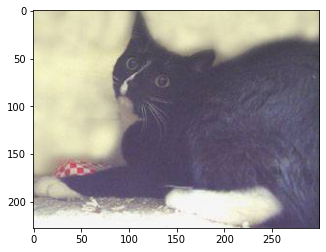

In [25]:
import tensorflow as tf
sample = random.choice(filenames)
image = Image.open("train/"+sample)
plt.imshow(image)

In [22]:
# load_img!pip install tensorflow

## Splitting of Dataset

In [26]:
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(df, test_size=0.2, random_state = 42)
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

## Generating Training Data

In [28]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [30]:
train_generator = train_data_gen.flow_from_dataframe(
    train_data, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 20000 validated image filenames belonging to 2 classes.


## Generating Validation Data

In [32]:
valid_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

valid_generator = valid_data_gen.flow_from_dataframe(valid_data, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 5000 validated image filenames belonging to 2 classes.


## *Deep CNN Model*

In [33]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=(128,128,3)),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=2, activation='softmax')
])

2022-06-08 11:06:51.007771: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/cvpia/catkin_ws/devel/lib:/usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/local/cuda-10.1/lib64:/usr/local/cuda-11.0/targets/x86_64-linux/lib/libcudart.so.11.0
2022-06-08 11:06:51.007903: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/cvpia/catkin_ws/devel/lib:/usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/local/cuda-10.1/lib64:/usr/local/cuda-11.0/targets/x86_64-linux/lib/libcudart.so.11.0
2022-06-08 11:06:51.007959: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

##### This will show how our model architecture looks like in the form of an image.

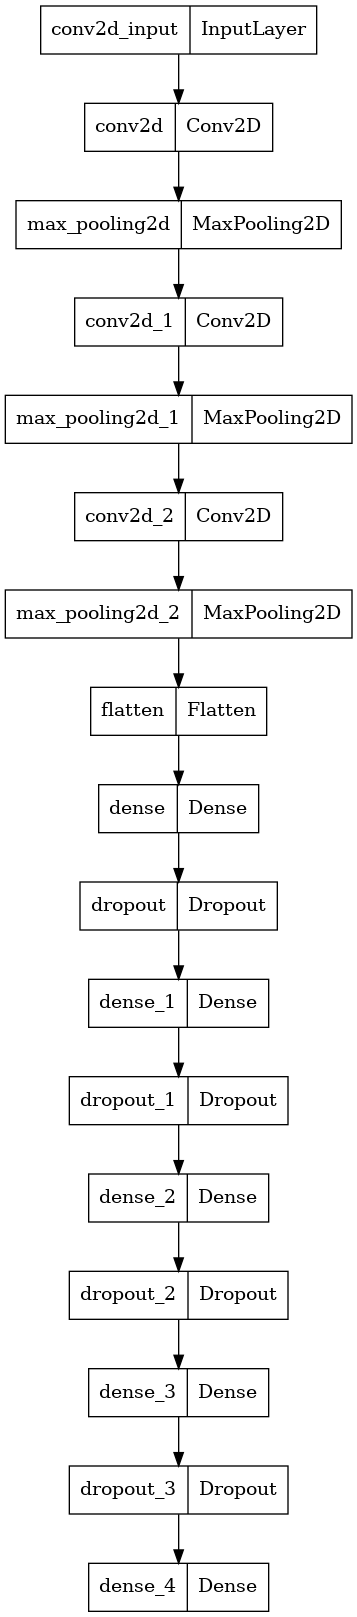

In [34]:
keras.utils.plot_model(model, 'model.png')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [36]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

## Model Training

In [37]:
model.fit(train_generator, epochs=30, verbose=1, validation_data=valid_generator)

Epoch 1/30
1334/1334 [==============================] - 110s 82ms/step - loss: 0.6939 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5076
Epoch 2/30
1334/1334 [==============================] - 109s 82ms/step - loss: 0.6934 - accuracy: 0.4989 - val_loss: 0.6936 - val_accuracy: 0.4924
Epoch 3/30
1334/1334 [==============================] - 109s 82ms/step - loss: 0.6933 - accuracy: 0.5010 - val_loss: 0.6930 - val_accuracy: 0.5076
Epoch 4/30
1334/1334 [==============================] - 109s 82ms/step - loss: 0.6934 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5076
Epoch 5/30
1334/1334 [==============================] - 109s 82ms/step - loss: 0.6934 - accuracy: 0.4956 - val_loss: 0.6931 - val_accuracy: 0.5076
Epoch 6/30
1334/1334 [==============================] - 110s 82ms/step - loss: 0.6933 - accuracy: 0.5008 - val_loss: 0.6933 - val_accuracy: 0.4924
Epoch 7/30
1334/1334 [==============================] - 108s 81ms/step - loss: 0.6934 - accuracy: 0.5022 - val_loss: 0

## Saving Model

In [38]:
model.save('cat_vs_dog_model.h5')

In [39]:
test_filenames = os.listdir("test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
idlist=[]
for file in test_df["filename"]:
    idlist.append(file.split(".")[0])

#test_df['ids'] = alist
nb_samples = test_df.shape[0]

## Generating Test Data

In [41]:
from keras.preprocessing.image import ImageDataGenerator
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(128,128),
    batch_size=15,
    shuffle=False
)

Found 12500 validated image filenames.


## Model Testing

In [42]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/15))

834/834 [==============================] - 23s 28ms/step


In [43]:
test_df['category'] = np.argmax(predict, axis=-1)

In [44]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [45]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

## Submission

In [46]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

##### I hope you find this notebook useful.
##### Please do upvote if you learn something from it.
##### Feel free to suggest any changes and provide your valuable feedback in the comments.

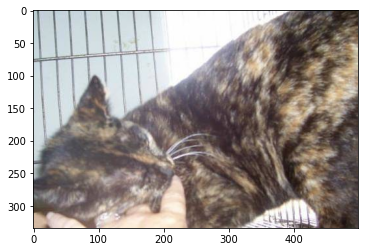

In [49]:
from PIL import Image
img1=Image.open('dataset/test_set/cats/cat.4006.jpg')
plt.imshow(img1)

In [52]:
(model.predict(img1) > 0.5).astype(int)

ValueError: Failed to find data adapter that can handle input: <class 'PIL.JpegImagePlugin.JpegImageFile'>, <class 'NoneType'>

In [53]:
model.predict(img1)

ValueError: Failed to find data adapter that can handle input: <class 'PIL.JpegImagePlugin.JpegImageFile'>, <class 'NoneType'>